In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass


hello guys this is a simple over view for yolov8 for object detection intro course so biggners are welcome! :) (hope you enjoy)

so we will use this [public dataset](https://www.kaggle.com/datasets/yusufberksardoan/traffic-detection-project/code?datasetId=3702648&sortBy=dateRun&tab=profile) which thanks to [Youssef](https://www.kaggle.com/yusufberksardoan) for making this dataset optional: we will use my [Dataset](https://www.kaggle.com/datasets/philopateergeorgei/cooler) for testing this dataset just has 1 vid which we will test the model on later

# Training our model

In [1]:
#will before we do anything we will need ultralytics so lets pip install that
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 13.6 MB/s eta 0:00:00a 0:00:01


In [2]:
import os
import cv2
from ultralytics import YOLO 
import tensorflow as tf 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Lets now train our model
with tf.device("/GPU"): #this will force the note book to use the GPU
    model = YOLO("yolov8n.yaml") 
    results = model.train(data="/kaggle/input/traffic-detection-project/data.yaml", epochs=15) 


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 755k/755k [00:00<00:00, 42.8MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 165MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/traffic-detection-project/train/labels... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:15<00:00, 375.57it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/traffic-detection-project/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/traffic-detection-project/valid/labels... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:01<00:00, 342.44it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/traffic-detection-project/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      2.63G      3.388      3.392       3.17        201        640: 100%|██████████| 363/363 [01:24<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.16it/s]


                   all        549       6270       0.91     0.0863      0.114     0.0452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      2.49G      2.095      1.831       1.78        264        640: 100%|██████████| 363/363 [01:15<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.35it/s]

                   all        549       6270      0.556      0.363      0.386      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15       2.6G      1.775      1.441      1.505        225        640: 100%|██████████| 363/363 [01:13<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.36it/s]

                   all        549       6270      0.617       0.45      0.491      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      2.51G      1.631      1.265      1.402        161        640: 100%|██████████| 363/363 [01:13<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.30it/s]

                   all        549       6270      0.703      0.518      0.575      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      2.52G      1.547      1.162      1.336        259        640: 100%|██████████| 363/363 [01:13<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.53it/s]

                   all        549       6270      0.619      0.563      0.612      0.375


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15       2.4G      1.436      1.049      1.306        141        640:  71%|███████   | 256/363 [00:49<00:20,  5.33it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

       7/15      2.41G      1.381     0.9757      1.269        190        640: 100%|██████████| 363/363 [01:07<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.79it/s]

                   all        549       6270       0.76      0.608      0.689      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      2.35G      1.339     0.9251      1.235        165        640: 100%|██████████| 363/363 [01:08<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.75it/s]

                   all        549       6270      0.769       0.64      0.718       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      2.42G        1.3     0.8782      1.217        125        640: 100%|██████████| 363/363 [01:07<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.54it/s]

                   all        549       6270       0.75      0.671      0.739      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      2.42G      1.271     0.8396      1.193        123        640: 100%|██████████| 363/363 [01:07<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.74it/s]

                   all        549       6270      0.785      0.686       0.76      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15       2.4G      1.241      0.815      1.177         97        640: 100%|██████████| 363/363 [01:07<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.68it/s]

                   all        549       6270      0.819      0.695       0.77      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      2.41G      1.223      0.791      1.168        163        640: 100%|██████████| 363/363 [01:07<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.76it/s]

                   all        549       6270      0.813      0.706      0.782      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      2.42G      1.198     0.7667      1.151        118        640: 100%|██████████| 363/363 [01:07<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.60it/s]

                   all        549       6270      0.813      0.723      0.797      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      2.41G      1.185     0.7469      1.141        107        640: 100%|██████████| 363/363 [01:07<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.68it/s]

                   all        549       6270      0.829      0.726      0.806      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      2.42G      1.162     0.7303      1.127         99        640: 100%|██████████| 363/363 [01:06<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.77it/s]

                   all        549       6270      0.837      0.734      0.805      0.539



15 epochs completed in 0.318 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
YOLOv8n summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.98it/s]


                   all        549       6270      0.838      0.733      0.805      0.539
               bicycle        549        250      0.894       0.71      0.797      0.563
                   bus        549        108      0.887      0.824      0.876      0.705
                   car        549       3842      0.889      0.878      0.941      0.687
             motorbike        549       1238       0.83      0.679      0.778      0.433
                person        549        832      0.688      0.576      0.635      0.309
Speed: 0.6ms preprocess, 1.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃▆█▇▇▇▆▅▅▄▄▃▂▂▁
lr/pg1,▃▆█▇▇▇▆▅▅▄▄▃▂▂▁
lr/pg2,▃▆█▇▇▇▆▅▅▄▄▃▂▂▁
metrics/mAP50(B),▁▄▅▆▆▇▇▇▇██████
metrics/mAP50-95(B),▁▃▄▅▆▆▆▇▇▇█████
metrics/precision(B),█▁▂▄▂▄▅▅▅▆▆▆▆▆▇
metrics/recall(B),▁▄▅▆▆▇▇▇▇▇█████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▄▃▂▂▂▂▂▁▁▁▁▁▁▁


if they ask for an API key you will find it [here](https://wandb.ai/site) (this site is weight and biases)

# Testing our model

this next part is optional but recommended

you will need my dataset which you can find [here](https://www.kaggle.com/datasets/philopateergeorgei/cooler) It has a vid which we will need for testing

In [4]:
from ultralytics import YOLO

# Load the model and run the tracker with a custom configuration file
model = YOLO('yolov8n.pt')
results = model.track(source="/kaggle/input/traffic-detection-project/test/images", save=True, save_txt=True)

requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 11.0s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


image 1/279 /kaggle/input/traffic-detection-project/test/images/aguanambi-1000_png_jpg.rf.7179a0df58ad6448028bc5bc21dca41e.jpg: 640x640 3 persons, 3 cars, 2 buss, 2 trucks, 6.9ms
image 2/279 /kaggle/input/traffic-detection-project/test/images/aguanambi-1095_png_jpg.rf.4d9f0370f1c09fb2a1d1666b155911e3.jpg: 640x640 1 person, 1 car, 6.3ms
image 3/279 /kaggle/input/traffic-detection-project/test/images/aguanambi-1100_png_jpg.rf.8b7574e1c4f3fd7b654c2a693404fd2d.jpg: 640x640 1 person, 3 cars, 5 buss, 2 trucks, 1 traffic light, 1 toilet, 6.5ms
image 4/279 /kaggle/input/traffic-detection-project/test/images/aguanambi-1240_png_jpg.rf.7e110b54d205ef0537ddc5dec81a79c2.jpg: 6

In [12]:
import os
os.listdir('/kaggle/working/')

['yolov8n.pt', 'wandb', 'runs', '.virtual_documents']

In [8]:
import os
import shutil
import cv2
import numpy as np
import pandas as pd
from ultralytics import YOLO
from IPython.display import Image, Video
import matplotlib.pyplot as plt



0: 640x640 3 persons, 3 cars, 2 buss, 2 trucks, 10.1ms
Speed: 2.2ms preprocess, 10.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
280 labels saved to runs/detect/predict/labels


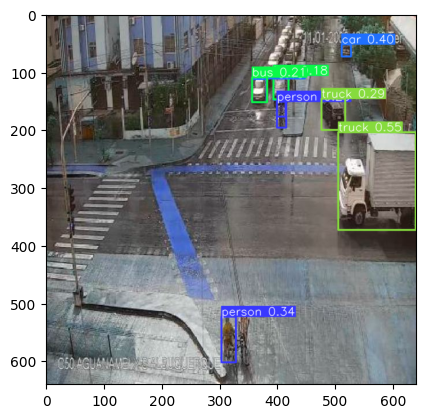

In [9]:

path = r'/kaggle/input/traffic-detection-project/test/images/aguanambi-1000_png_jpg.rf.7179a0df58ad6448028bc5bc21dca41e.jpg'
frame = cv2.imread(path)
results = model.track(frame, persist=True)

        # Visualize the results on the frame
annotated_frame = results[0].plot()
plt.imshow(annotated_frame)

In [14]:
import cv2
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Open the video file
video_path = "/kaggle/input/test-video/testvid.mp4"
cap = cv2.VideoCapture(video_path)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter('/kaggle/working/video.mp4', fourcc, 25, (frame.shape[1], frame.shape[0]))
# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        video.write(annotated_frame)

        # Break the loop if 'q' is pressed
        
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
video.release()

cv2.destroyAllWindows()


0: 384x640 (no detections), 7.4ms
Speed: 1.1ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bus, 1 car, 6.7ms
Speed: 1.6ms preprocess, 6.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bus, 6.5ms
Speed: 1.3ms preprocess, 6.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.8ms
Speed: 1.4ms preprocess, 6.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.7ms
Speed: 1.4ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.7ms
Speed: 1.4ms preprocess, 6.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.6ms
Speed: 1.4ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bus, 8.6ms
Speed: 1.4ms preprocess, 8.6ms inference, 2.1ms postprocess per image a

error: OpenCV(4.8.0) /io/opencv/modules/highgui/src/window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


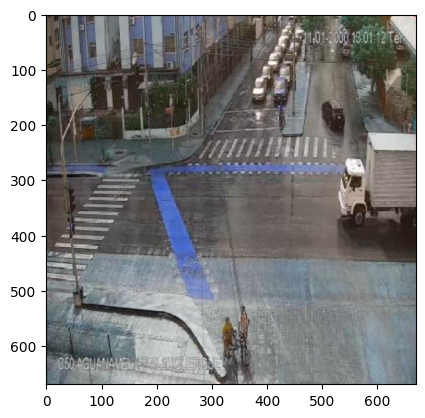

(670, 670, 3)


In [11]:
import cv2
import matplotlib.pyplot as plt
path = r'/kaggle/input/traffic-detection-project/test/images/aguanambi-1000_png_jpg.rf.7179a0df58ad6448028bc5bc21dca41e.jpg'
img = cv2.imread(path)
img2 = cv2.resize(img,(670,670))
plt.imshow(img2)
plt.show()
print(img2.shape)